In [30]:
import torch
import numpy as np

In [31]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)

In [32]:
np_array = np.array(data)
x_np = torch.tensor(np_array)

x_ones = torch.ones_like(x_data)
print(f'ones tensor: \n {x_ones} \n')
x_rand = torch.rand_like(x_data,dtype=torch.float)
print(f'random tensor: \n {x_rand} \n')

ones tensor: 
 tensor([[1, 1],
        [1, 1]]) 

random tensor: 
 tensor([[0.4471, 0.1420],
        [0.4805, 0.2199]]) 



In [33]:
shape = (2,3,)

rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f'random tensor: \n {rand_tensor} \n')
print(f'ones tensor: \n {ones_tensor} \n')
print(f'zeros tensor: \n {zeros_tensor} \n' )


random tensor: 
 tensor([[0.8919, 0.4901, 0.7227],
        [0.2959, 0.7639, 0.7070]]) 

ones tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

zeros tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [34]:
tensor = torch.rand(3,4)

print(f'shape of tensor: {tensor.shape}')
print(f'datatype of tensor:{tensor.dtype}')
print(f'device tensor is stored on:{tensor.device}')

shape of tensor: torch.Size([3, 4])
datatype of tensor:torch.float32
device tensor is stored on:cpu


In [35]:
if torch.cuda.is_available():
    tensor = tensor.to('cuda')
    print(f'device tensor is stored on: {tensor.device}')

device tensor is stored on: cuda:0


In [36]:
tensor = torch.ones((4,4))
tensor[:,1] = 0
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [37]:
t1 = torch.cat([tensor,tensor,tensor], dim=1)
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [38]:
print(f'tensor.mul(tensor) \n {tensor.mul(tensor)} \n')

print(f'tensor*tensor \n {tensor*tensor}')

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor*tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [39]:
print(f'tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n')
print(f'tensor @ tensor.T \n {tensor @ tensor.T}')

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])


In [40]:
print(tensor,'\n')
tensor.add_(5)
print(tensor)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])


In [41]:
t = torch.ones(5)
print(f't:{t}')
n=t.numpy()
print(f'n:{n}')

t:tensor([1., 1., 1., 1., 1.])
n:[1. 1. 1. 1. 1.]


In [42]:
t.add_(1)
print(f't:{t}')
print(f'n:{n}')

t:tensor([2., 2., 2., 2., 2.])
n:[2. 2. 2. 2. 2.]


In [43]:
n = np.ones(5)
t = torch.from_numpy(n)

In [44]:
np.add(n,1, out=n)
print(f't:{t}')
print(f'n:{n}')

t:tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
n:[2. 2. 2. 2. 2.]


In [45]:
import torch
from torchvision.models import resnet18, ResNet18_Weights

model = resnet18(weights = ResNet18_Weights.DEFAULT)
data = torch.rand(1,3,64,64)
labels = torch.rand(1,1000)


In [46]:
prediction = model(data)

In [47]:
loss = (prediction - labels).sum()
loss.backward()


In [48]:
optim = torch.optim.SGD(model.parameters(),lr=1e-2,momentum=0.9)


In [49]:
optim.step()

In [50]:
import torch

a = torch.tensor([2.,3.], requires_grad = True)
b = torch.tensor([6.,4.], requires_grad = True)



In [51]:
Q = 3*a**3 - b**2

In [52]:
external_grad = torch.tensor([1.,1.])
Q.backward(gradient=external_grad)

In [53]:
print(9*a**2 == a.grad)
print(-2*b == b.grad)

tensor([True, True])
tensor([True, True])


In [54]:
x = torch.rand(5,5)
y = torch.rand(5,5)
z = torch.rand((5,5), requires_grad = True)

a = x+y
print(f"Does 'a' require gradients?: {a.requires_grad}")
print(f'Does "b" require gradients?: {b.requires_grad}')

Does 'a' require gradients?: False
Does "b" require gradients?: True


In [55]:
from torch import nn, optim

model = resnet18(weights = ResNet18_Weights.DEFAULT)

for param in model.parameters():
    param.requires_grad = False
    

In [56]:
model.fc = nn.Linear(512,10)

In [57]:
optimizer = optim.SGD(model.parameters(),lr=1e-2,momentum=0.9)

In [58]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    
    def __init__(self):
        super(Net,self).__init__()
        self.conv1 = nn.Conv2d(1,6,5)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5,120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
    
#     def forward(self,x):
#         x = self.conv1(x)
#         x = F.relu(x)
        
#         x = F.max_pool2d(x,(2,2))
        
#         x = self.conv2(x)
#         x = F.relu(x)
        
#         x = F.max_pool2d(x,2)
        
#         x = torch.flatten(x,1)
#         x = self.fc1(x)
#         x = F.relu(x)
        
#         x = self.fc2(x)
#         x = F.relu(x)
#         x = self.fc3(x)
        
#         return x
    def forward(self,x):
        x = F.max_pool2d(F.relu(self.conv1(x)),(2,2))
        x = F.max_pool2d(F.relu(self.conv2(x)),2)
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    
net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [59]:
params =list(net.parameters())
print(len(params))
print(params[0].size())

10
torch.Size([6, 1, 5, 5])


In [60]:
input = torch.randn(1,1,32,32)
out = net(input)
print(out)

tensor([[-0.0442, -0.0514,  0.1387, -0.0356,  0.1225,  0.0885,  0.0584,  0.0174,
          0.1865,  0.0792]], grad_fn=<AddmmBackward0>)


In [61]:
net.zero_grad()
out.backward(torch.randn(1,10))

In [62]:
output = net(input)
target = torch.randn(10) #dummy target
target = target.reshape((1,-1))
criterion = nn.MSELoss()

loss = criterion(output,target)
print(loss)


tensor(1.0478, grad_fn=<MseLossBackward0>)


In [63]:
print(loss.grad_fn)
print(loss.grad_fn.next_functions[0][0])
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])

In [64]:
net.zero_grad()
print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)
loss.backward()

print('conv1.bias.grad after backward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after backward
tensor([ 0.0059, -0.0091, -0.0174, -0.0026, -0.0129, -0.0028])


In [65]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

In [66]:
import torch.optim as optim

optimizer =optim.SGD(net.parameters(), lr=0.01)
optimizer.zero_grad()
output = net(input)
loss = criterion(output,target)
loss.backward()
optimizer.step()

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data',train=True,
                                        download=True,transform = transform)

trainloader = torch.utils.data.DataLoader(trainset,batch_size = batch_size,
                                          shuffle = True, num_workers = 2)

testset = torchvision.datasets.CIFAR10(root='./data', train = False,
                                      download = True, transform = transform)

testloadeer = torch.utils.data.DataLoader(testset,batch_size = batch_size,
                                          shuffle = False, num_workers = 2)

classes = ('plane','car','bird','cat',
          'deer','dog','frog','horse','ship','truck')


Files already downloaded and verified
Files already downloaded and verified


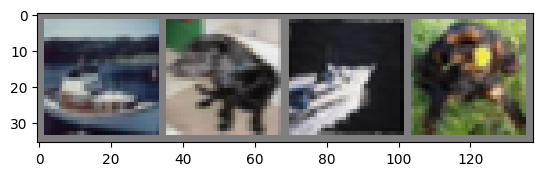

ship  dog   ship  dog  


In [5]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

dataiter = iter(trainloader)
images,labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [6]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3,6,5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6,16,5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120,84)
        self.fc3 = nn.Linear(84,10)
        
    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x,1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()
        
    

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum = 0.9)


In [8]:
for epoch in range(2):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs,labels)
        print(loss)

        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print(f'[{epoch+1},{i+1:5d}] loss: {running_loss /2000 :.3f}')
            running_loss = 0.0
            
print('Finished Training')

            
    
    

tensor(2.2358, grad_fn=<NllLossBackward0>)
tensor(2.3463, grad_fn=<NllLossBackward0>)
tensor(2.3270, grad_fn=<NllLossBackward0>)
tensor(2.3034, grad_fn=<NllLossBackward0>)
tensor(2.2790, grad_fn=<NllLossBackward0>)
tensor(2.3178, grad_fn=<NllLossBackward0>)
tensor(2.2683, grad_fn=<NllLossBackward0>)
tensor(2.2722, grad_fn=<NllLossBackward0>)
tensor(2.2757, grad_fn=<NllLossBackward0>)
tensor(2.3255, grad_fn=<NllLossBackward0>)
tensor(2.2729, grad_fn=<NllLossBackward0>)
tensor(2.3090, grad_fn=<NllLossBackward0>)
tensor(2.3091, grad_fn=<NllLossBackward0>)
tensor(2.3025, grad_fn=<NllLossBackward0>)
tensor(2.2979, grad_fn=<NllLossBackward0>)
tensor(2.3049, grad_fn=<NllLossBackward0>)
tensor(2.2718, grad_fn=<NllLossBackward0>)
tensor(2.3144, grad_fn=<NllLossBackward0>)
tensor(2.3523, grad_fn=<NllLossBackward0>)
tensor(2.3349, grad_fn=<NllLossBackward0>)
tensor(2.3036, grad_fn=<NllLossBackward0>)
tensor(2.3110, grad_fn=<NllLossBackward0>)
tensor(2.2601, grad_fn=<NllLossBackward0>)
tensor(2.28

Traceback (most recent call last):
  File "/opt/conda/envs/d2l-zh/lib/python3.8/multiprocessing/queues.py", line 245, in _feed
    send_bytes(obj)
  File "/opt/conda/envs/d2l-zh/lib/python3.8/multiprocessing/connection.py", line 200, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/opt/conda/envs/d2l-zh/lib/python3.8/multiprocessing/connection.py", line 411, in _send_bytes
    self._send(header + buf)
  File "/opt/conda/envs/d2l-zh/lib/python3.8/multiprocessing/connection.py", line 368, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe


KeyboardInterrupt: 

In [73]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

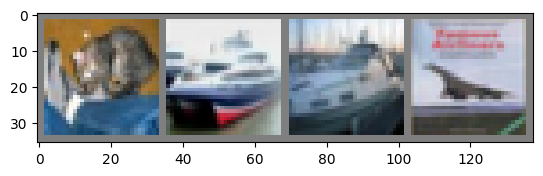

GroudTruth: cat   ship  ship  plane


In [74]:
dataiter = iter(testloadeer)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images))
print('GroudTruth:',' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))


In [75]:
net = Net()
net.load_state_dict(torch.load(PATH))


<All keys matched successfully>

In [76]:
outputs = net(images)

In [77]:
_, predicted = torch.max(outputs,1)
print('Predicted:',' '.join(f'{classes[predicted[j]]:5s}' for j in range(4)))

Predicted: cat   ship  ship  plane


In [10]:
correct = 0
total =0

with torch.no_grad():
    for data in testloadeer:
        images,labels = data
        outputs = net(images)
        print(outputs.shape)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100*correct // total} %')



    
        

torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])
torch.Size([4, 10])


KeyboardInterrupt: 

In [79]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

with torch.no_grad():
    for data in testloadeer:
        images,labels = data
        outputs = net(images)
        _,predictions = torch.max(outputs, 1)
        for label, prediction in zip(labels,predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]]+=1

for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy: .1f} %')
                
        

Accuracy for class: plane is  66.8 %
Accuracy for class: car   is  75.5 %
Accuracy for class: bird  is  36.8 %
Accuracy for class: cat   is  62.4 %
Accuracy for class: deer  is  50.4 %
Accuracy for class: dog   is  33.3 %
Accuracy for class: frog  is  63.0 %
Accuracy for class: horse is  64.6 %
Accuracy for class: ship  is  63.8 %
Accuracy for class: truck is  35.1 %


In [80]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [81]:
net.to(device)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [82]:
inputs, labels = data[0].to(device), data[1].to(device)